In [1]:
import warnings
import numpy as np
from datetime import datetime
import glob
warnings.filterwarnings('ignore')
import ta
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,Embedding


In [2]:
data = pd.read_csv('XAUUSD.uk+1.csv')

In [3]:
data.head()

,Date,Time,open,High,Low,Close,Volume
0,2020.05.21,23:33,1726.16,1726.16,1726.01,1726.05,22
1,2020.05.21,23:34,1726.05,1726.09,1725.95,1726.09,16
2,2020.05.21,23:35,1726.09,1726.25,1726.09,1726.25,10
3,2020.05.21,23:36,1726.25,1726.31,1726.12,1726.30,38
4,2020.05.21,23:37,1726.30,1726.30,1726.13,1726.16,11


In [4]:
window_size = 14
smooth_level = 0.15

/home/gaurav/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


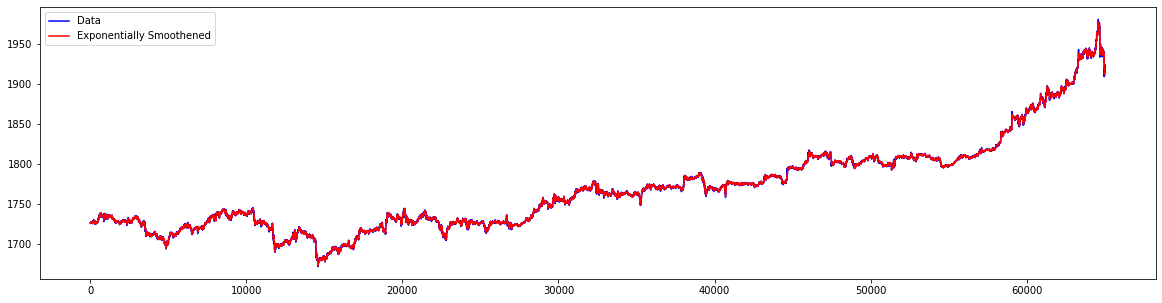

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt

exponential_smoothening = data["Close"]
exponential_smoothening = np.array(exponential_smoothening)

model = Holt(exponential_smoothening, damped=True).fit(smoothing_level=smooth_level)
fcast1 = model.predict(window_size)


plt.figure(figsize=(20,5))
plt.plot(range(len(data["Close"])),data["Close"],color="blue")
plt.plot(range(window_size-1,len(fcast1)+window_size-1),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

In [6]:
exponential_smoothening = data["open"]
exponential_smoothening = np.array(exponential_smoothening)
print(exponential_smoothening.shape)

model = Holt(exponential_smoothening, damped=True).fit(smoothing_level=smooth_level)
fcastopen = model.predict(window_size)
expOpen = pd.Series(fcastopen)

(65015,)


/home/gaurav/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [7]:
exponential_smoothening = data["Close"]
exponential_smoothening = np.array(exponential_smoothening)
print(exponential_smoothening.shape)

model = Holt(exponential_smoothening, damped=True).fit(smoothing_level=smooth_level)
fcastClose = model.predict(window_size)
expClose = pd.Series(fcastClose)

(65015,)


/home/gaurav/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [8]:
exponential_smoothening = data["High"]
exponential_smoothening = np.array(exponential_smoothening)
print(exponential_smoothening.shape)

model = Holt(exponential_smoothening, damped=True).fit(smoothing_level=smooth_level)
fcastHigh = model.predict(window_size)
expHigh = pd.Series(fcastHigh)

(65015,)


/home/gaurav/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [9]:
exponential_smoothening = data["Low"]
exponential_smoothening = np.array(exponential_smoothening)
print(exponential_smoothening.shape)

model = Holt(exponential_smoothening, damped=True).fit(smoothing_level=smooth_level)
fcastLow = model.predict(window_size)
expLow = pd.Series(fcastLow)

(65015,)


/home/gaurav/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [10]:
frame = {'Open': expOpen, 'Close': expClose, 'High': expHigh, 'Low':expLow}
df = pd.DataFrame(frame)

In [11]:
rsi_series = ta.momentum.RSIIndicator(data["Close"], n=14).rsi()

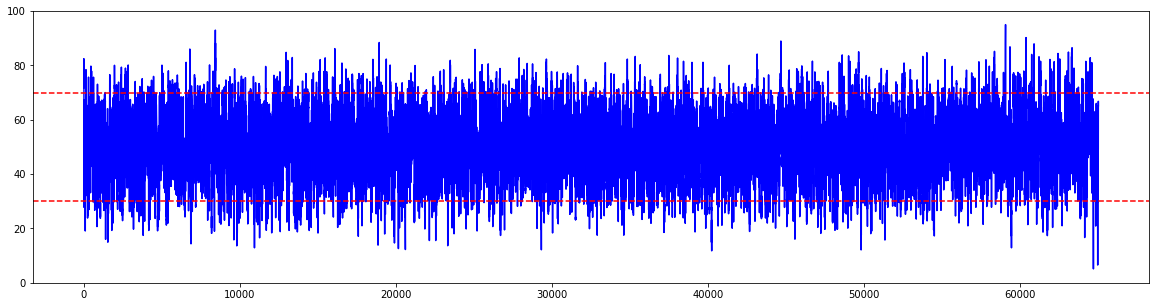

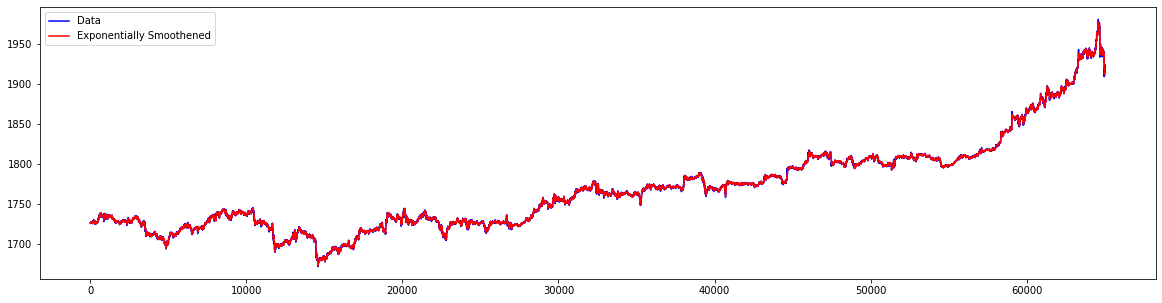

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(rsi_series)), rsi_series, color="blue")
plt.ylim(0,100)
plt.axhline(y=30, color='r', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.show()


plt.figure(figsize=(20,5))
plt.plot(range(len(data["Close"])),data["Close"],color="blue")
plt.plot(range(window_size-1,len(fcast1)+window_size-1),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

In [13]:
df['L14'] = data['Low'].rolling(window=window_size).min()
df['H14'] = data['High'].rolling(window=window_size).max()
df['Stochastic_Oscillator'] = 100 * ((df['Close'][13:] - df['L14']) / (df['H14'] - df['L14']))


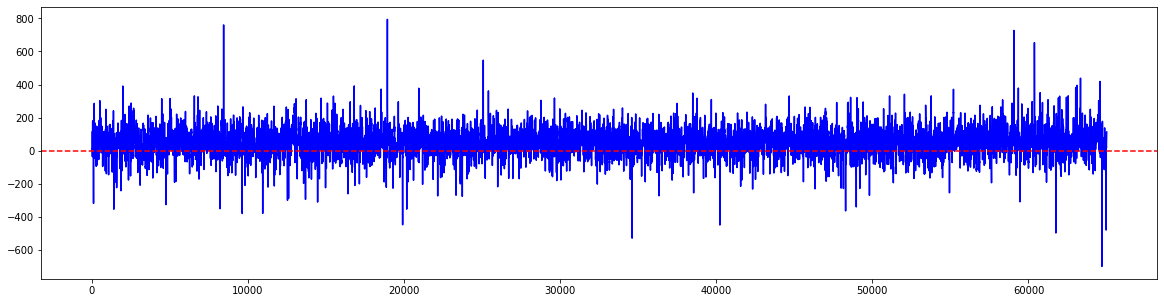

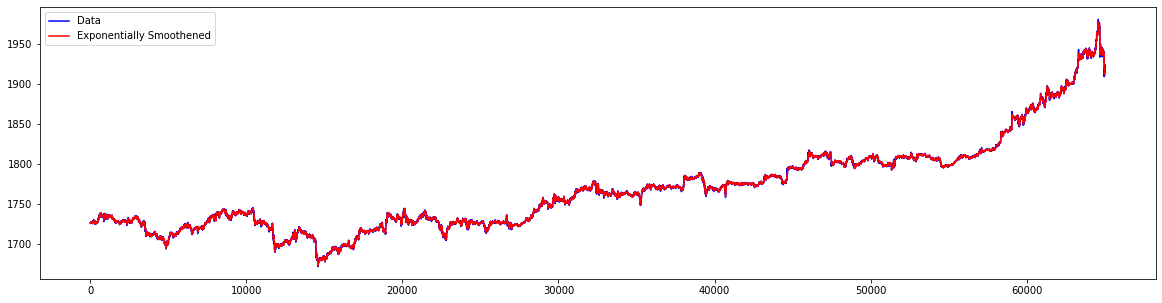

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(range(window_size-1,len(df['Stochastic_Oscillator'])+window_size-1),df['Stochastic_Oscillator'],color="blue")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(range(len(data["Close"])),data["Close"],color="blue")
plt.plot(range(window_size-1,len(fcast1)+window_size-1),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

In [15]:
s = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close']).wr()

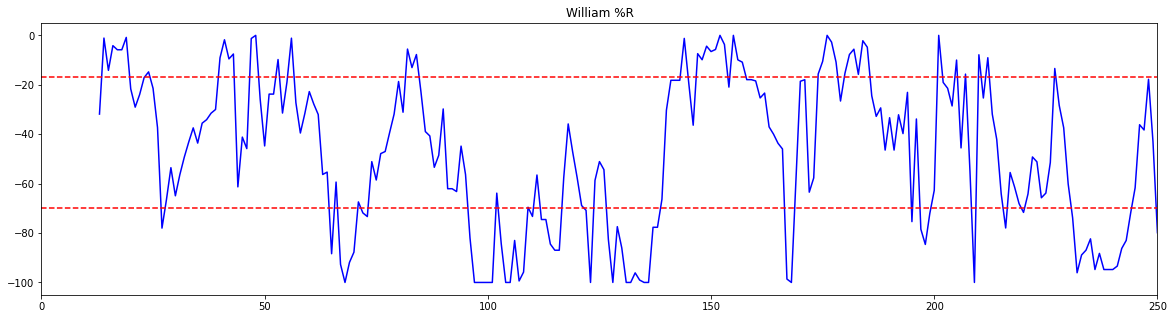

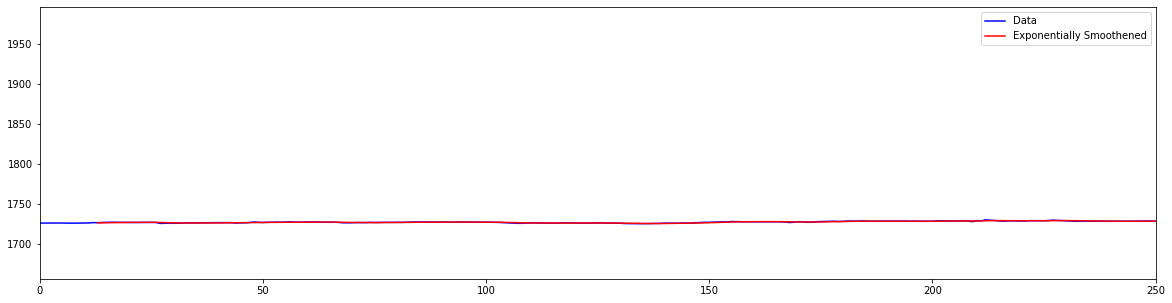

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(range(window_size-1,len(s[13:])+window_size-1), s[13:], color="blue")
plt.xlim(0,250)
plt.title('William %R')
plt.axhline(y=-17, color='r', linestyle='--')
plt.axhline(y=-70, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(range(len(data["Close"])),data["Close"],color="blue")
plt.plot(range(window_size-1,len(fcast1)+window_size-1),fcast1,color="red")
plt.xlim(0,250)
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

In [17]:
df['ROC'] = pd.Series()
df['ROC'][0] = 0

In [18]:
for i in range(0, df['Close'].size-1):
    df['ROC'][i+1] = (df['Close'][i]-df['Close'][i+1])/df['Close'][i]

In [19]:
df['ROC'].size

65001

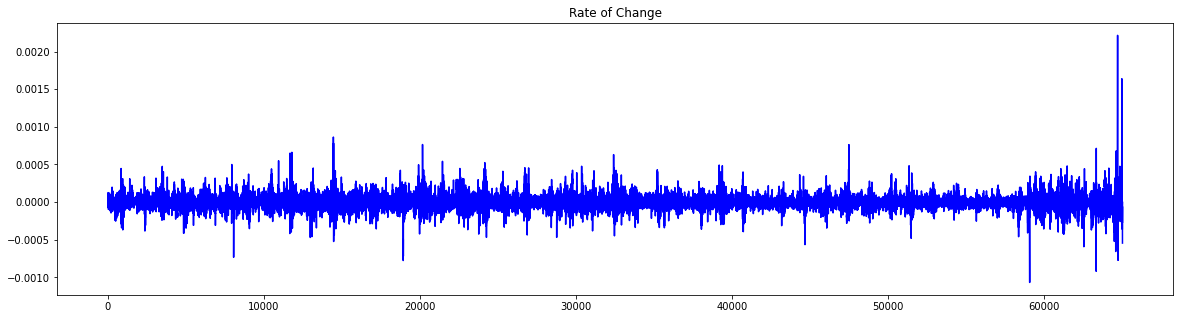

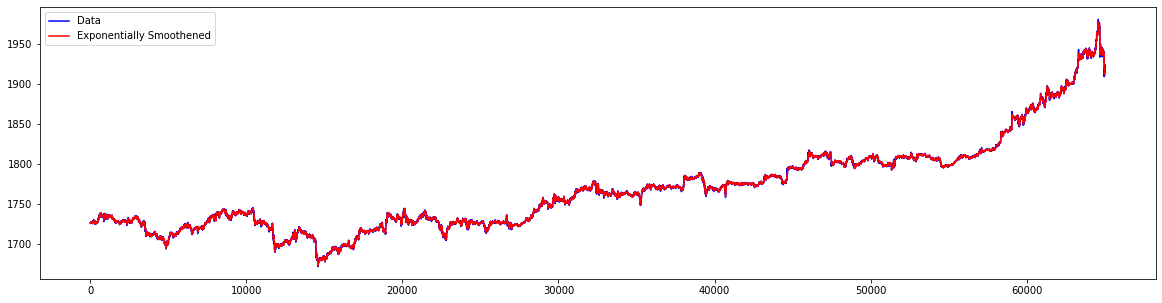

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(range(13,len(df['ROC'])+13), df['ROC'], color="blue")
plt.title('Rate of Change')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(range(len(data["Close"])),data["Close"] ,color="blue")
plt.plot(range(13,len(fcast1)+13),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

65015


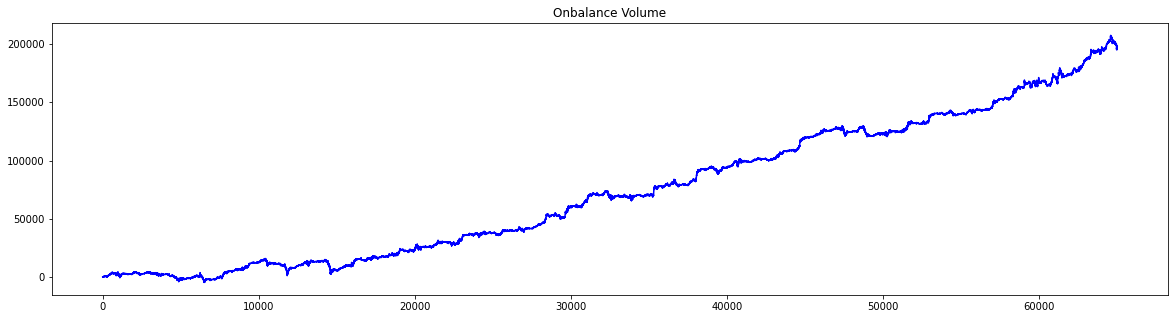

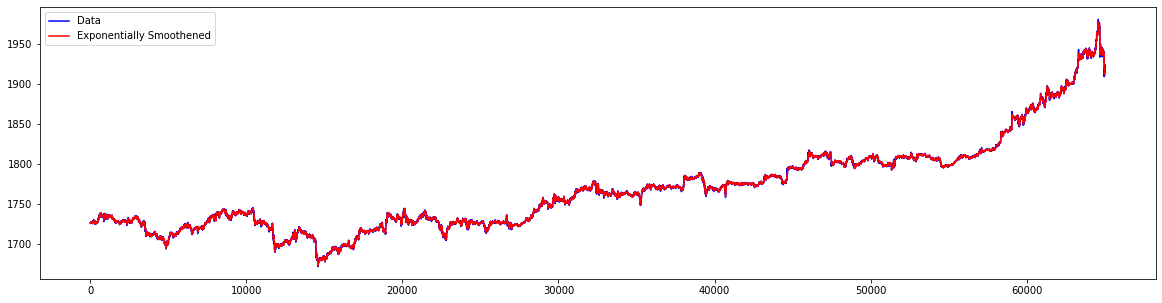

In [21]:
obv = ta.volume.OnBalanceVolumeIndicator(data['Close'], data['Volume']).on_balance_volume()
print(obv.size)
plt.figure(figsize=(20, 5))
plt.plot(range(len(obv)), obv, color="blue")
plt.title('Onbalance Volume')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(range(len(data["Close"])),data["Close"] ,color="blue")
plt.plot(range(13,len(fcast1)+13),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

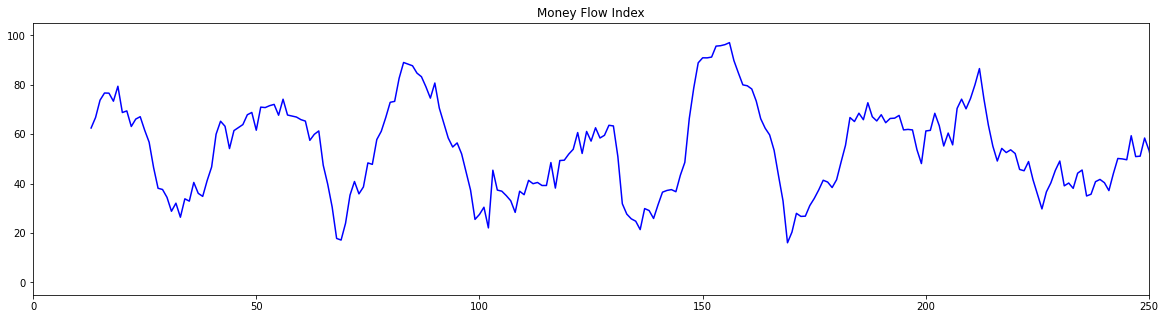

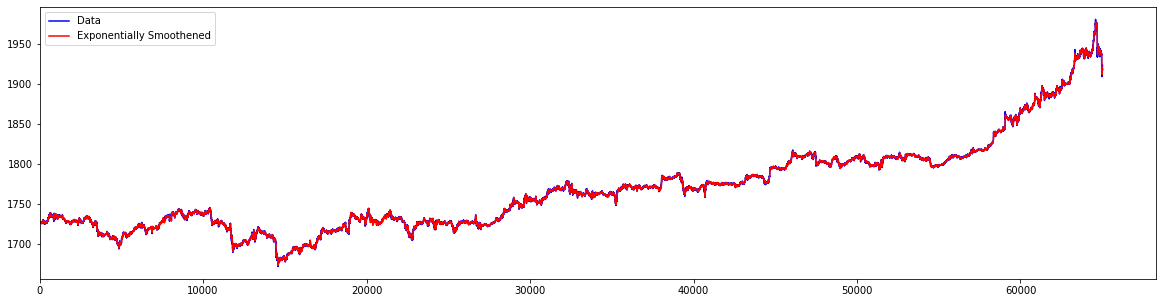

In [22]:
MFI = ta.volume.MFIIndicator(data["High"],data["Low"],data["Close"],data["Volume"]).money_flow_index()
df["MFI"] = MFI

plt.figure(figsize=(20, 5))
plt.plot(range(len(MFI)), MFI, color="blue")
plt.xlim(0,250)
plt.title('Money Flow Index')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(range(len(data["Close"])),data["Close"] ,color="blue")
plt.xlim(0,)
plt.plot(range(13,len(fcast1)+13),fcast1,color="red")
plt.legend(['Data', 'Exponentially Smoothened'])
plt.show()

In [23]:
df['RSI'] = rsi_series

In [24]:
df["WilliamR"] = s[window_size - 1:]
df['OBV'] = obv

In [25]:
df = df.drop(['L14', 'H14'], axis=1)

In [26]:
Technical_dataset = df[window_size - 1:].reset_index(drop='True')

In [27]:
Technical_dataset['result'] = Technical_dataset['Close'] - Technical_dataset['Close'].shift(1)
return_range = Technical_dataset['result'].max() - Technical_dataset['result'].min()
Technical_dataset['result'] = Technical_dataset['result'] / return_range
#ADX

In [28]:
Technical_dataset['target_label'] = Technical_dataset['result'].shift(-1)
Technical_dataset['target_label'] = Technical_dataset['target_label'].apply(lambda x: 1 if x>0.0 else 0)
Technical_dataset.tail()

,Open,Close,High,Low,Stochastic_Oscillator,ROC,MFI,RSI,WilliamR,OBV,result,target_label
64983,1917.788530,1917.766091,1918.863613,1916.685231,78.919186,0.000005,40.416698,43.832872,-43.475126,196501,-0.001519,1
64984,1917.778065,1917.878798,1919.108122,1916.830835,86.464409,-0.000059,40.139753,46.182418,-32.134480,196804,0.017845,1
64985,1917.891248,1918.110096,1919.259429,1916.986306,88.272842,-0.000121,45.972985,47.229545,-29.241595,197108,0.036621,1
64986,1918.121001,1918.433099,1919.453293,1917.364205,104.246845,-0.000168,52.908142,49.214046,-12.567325,197391,0.051140,1
64987,1918.476258,1919.478318,1920.369054,1917.715504,114.141735,-0.000545,59.522250,50.464256,-8.295762,197615,0.165487,0


In [29]:
X = Technical_dataset.drop(['target_label'],axis=1)
y = Technical_dataset['target_label']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, test_size=0.1,random_state=41,shuffle=False)

In [31]:
n_features = 2 # number of features

train_x = np.array([]).reshape([-1,n_features])
train_y = np.array([]).reshape([-1,1])
for index, row in Technical_dataset.iterrows():
    i = Technical_dataset.index.get_loc(index)
    if i<n_features:
        continue
    
    _x = np.array(Technical_dataset[i-n_features+1:i+1]['result']).T.reshape([1, -1])
    _y = Technical_dataset.loc[i]['target_label']
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
train_y = train_y.reshape([-1])
print(train_x.shape)
print(train_y.shape)
print('%% of Class0 : %f' % (np.count_nonzero(train_y == 0)/float(len(train_y))))
print('%% of Class1 : %f' % (np.count_nonzero(train_y == 1)/float(len(train_y))))

(64986, 2)
(64986,)
% of Class0 : 0.480057
% of Class1 : 0.519943


In [32]:
train_len = int(len(train_x)*0.95)
model_rnn = Sequential()
model_rnn.add(Dense(64, input_dim=2, activation='relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(32, input_dim=2, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(train_x[:train_len], train_y[:train_len],batch_size=260,epochs=150, verbose=2) 

Epoch 1/150
238/238 - 0s - loss: 0.5784 - accuracy: 0.7812
Epoch 2/150
238/238 - 0s - loss: 0.4262 - accuracy: 0.8097
Epoch 3/150
238/238 - 0s - loss: 0.4019 - accuracy: 0.8236
Epoch 4/150
238/238 - 0s - loss: 0.3937 - accuracy: 0.8290
Epoch 5/150
238/238 - 0s - loss: 0.3910 - accuracy: 0.8309
Epoch 6/150
238/238 - 0s - loss: 0.3902 - accuracy: 0.8307
Epoch 7/150
238/238 - 0s - loss: 0.3911 - accuracy: 0.8308
Epoch 8/150
238/238 - 0s - loss: 0.3905 - accuracy: 0.8311
Epoch 9/150
238/238 - 1s - loss: 0.3909 - accuracy: 0.8301
Epoch 10/150
238/238 - 0s - loss: 0.3898 - accuracy: 0.8310
Epoch 11/150
238/238 - 0s - loss: 0.3902 - accuracy: 0.8311
Epoch 12/150
238/238 - 0s - loss: 0.3897 - accuracy: 0.8318
Epoch 13/150
238/238 - 0s - loss: 0.3899 - accuracy: 0.8309
Epoch 14/150
238/238 - 0s - loss: 0.3906 - accuracy: 0.8306
Epoch 15/150
238/238 - 0s - loss: 0.3899 - accuracy: 0.8311
Epoch 16/150
238/238 - 0s - loss: 0.3895 - accuracy: 0.8315
Epoch 17/150
238/238 - 0s - loss: 0.3902 - accura

238/238 - 0s - loss: 0.3871 - accuracy: 0.8317
Epoch 138/150
238/238 - 0s - loss: 0.3866 - accuracy: 0.8317
Epoch 139/150
238/238 - 0s - loss: 0.3868 - accuracy: 0.8319
Epoch 140/150
238/238 - 1s - loss: 0.3872 - accuracy: 0.8321
Epoch 141/150
238/238 - 0s - loss: 0.3866 - accuracy: 0.8316
Epoch 142/150
238/238 - 1s - loss: 0.3871 - accuracy: 0.8314
Epoch 143/150
238/238 - 0s - loss: 0.3867 - accuracy: 0.8314
Epoch 144/150
238/238 - 0s - loss: 0.3868 - accuracy: 0.8318
Epoch 145/150
238/238 - 0s - loss: 0.3870 - accuracy: 0.8312
Epoch 146/150
238/238 - 0s - loss: 0.3868 - accuracy: 0.8314
Epoch 147/150
238/238 - 0s - loss: 0.3868 - accuracy: 0.8312
Epoch 148/150
238/238 - 0s - loss: 0.3874 - accuracy: 0.8310
Epoch 149/150
238/238 - 0s - loss: 0.3863 - accuracy: 0.8324
Epoch 150/150
238/238 - 0s - loss: 0.3867 - accuracy: 0.8321


,result,label,pred,won,pnl,equity
0,0.070606,1.0,0.0,False,-706.056820,-7.060568e+02
1,0.098655,1.0,1.0,True,986.552228,2.804954e+02
2,0.085715,1.0,1.0,True,857.150410,1.137646e+03
3,0.028047,1.0,1.0,True,280.465287,1.418111e+03
4,0.077277,1.0,1.0,True,772.774023,2.190885e+03
...,...,...,...,...,...,...
3244,-0.009596,0.0,1.0,False,-95.956308,5.015087e+06
3245,0.112707,1.0,0.0,False,-1127.069392,5.013960e+06
3246,0.231298,1.0,1.0,True,2312.984927,5.016273e+06
3247,0.323002,1.0,1.0,True,3230.021021,5.019503e+06


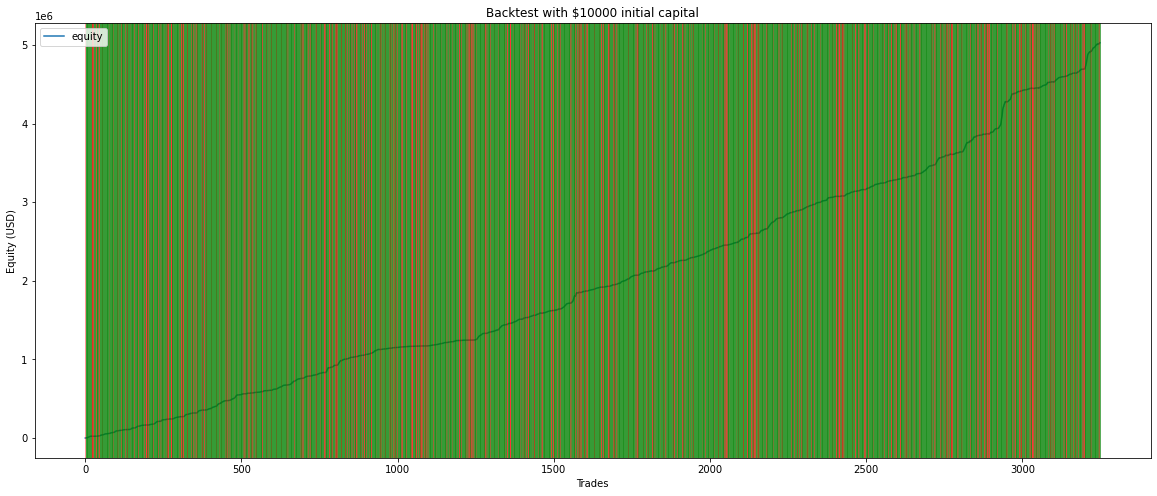

In [33]:

# Predict test data

pred = model_rnn.predict(train_x[train_len:])
pred = np.round(pred)



# Calculate equity..

contracts  = 10000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['result'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['result'] = df_trade['result'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    if row['won']:
        return abs(row['result'])*contracts - commission
    else:
        return -abs(row['result'])*contracts - commission

df_trade['pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['pnl'].cumsum()

display(df_trade)
# df_trade.plot(y='equity', figsize=(20,8), title='Backtest with $10000 initial capital')
# plt.xlabel('Trades')
# plt.ylabel('Equity (USD)')
# for r in df_trade.iterrows():
#     if r[1]['won']:
#         plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
#     else:
#         plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

Total Profit             : $5029955.39
Winning Trades           : 2722
Losing Trades            : 527
Profitable Percentage    : 83.78%
Average Win Trade        : $1984.059
Average Los Trade        : $-703.324
Largest Win Trade        : $43325.410
Largest Los Trade        : $-8852.105
Profit Factor            : 14.57


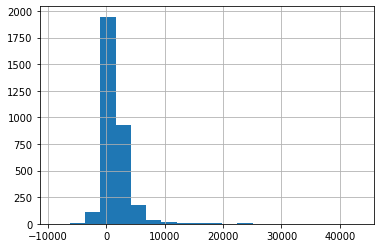

In [34]:
n_win_trades = float(df_trade[df_trade['pnl']>0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl']<0.0]['pnl'].count())
print("Total Profit             : $%.2f" % df_trade.tail(1)['equity'])
print("Winning Trades           : %d" % n_win_trades)
print("Losing Trades            : %d" % n_los_trades)
print("Profitable Percentage    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Average Win Trade        : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].mean())
print("Average Los Trade        : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].mean())
print("Largest Win Trade        : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].max())
print("Largest Los Trade        : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].min())
print("Profit Factor            : %.2f" % abs(df_trade[df_trade['pnl']>0.0]['pnl'].sum()/df_trade[df_trade['pnl']<0.0]['pnl'].sum()))

df_trade['pnl'].hist(bins=20)

In [35]:
df_trade.to_csv('trade.csv',index=None)